## Deployment Guide for ITCH file parser and VWAP calculator

<br>**Steps (Don't skip reading through the commented code in code cells)**
<br>1. Create python module called as vwap from the vwap.pyx (cython file)

In [45]:
# You can skip this step and directly the python file. 
# But make sure you include the vwap.cp37-win_amd64.pyd to root folder structure.
#$ python setup.py build_ext --inplace

<br>2. A new file named "vwap.cp37-win_amd64.pyd" will be created. Place this file in same folder where all your python libraries or modules are placed.
<br>3. Now run the command which calculates the VWAP for file which is given as command line argument to the python file created.

In [ ]:
#$ python calculate_vwap.py "C:/Users/Amandeep/Downloads/NASDAQ_DATA/01302019.NASDAQ_ITCH50.gz"

In [ ]:
#After running above line you should see

#The VWAP for each stock are stored in stock_vwap_full.csv
#Time taken to execute(in seconds) = 531.0053579807281 

#as result of previous command.

In [ ]:
#The stock_vwap_full.csv contains VWAP for all the stocks, 
#which is calculated as a 1 hour running average for all the stocks whose trade messages(cross and non-cross) were received.

In [56]:
# Let us explore the result
import pandas as pd
stocks_vwap = pd.read_csv("stock_vwap_full.csv", header = None)
stocks_vwap.columns = ['Stock Name', 'VWAP', 'Time of the Day(Nanoseconds)']
stocks_vwap['Formated Time of the Day'] = pd.to_timedelta(stocks_vwap['Time of the Day(Nanoseconds)'])

In [86]:
stocks_vwap.shape

(1331618, 4)

In [88]:
stocks_vwap.groupby(['Stock Name']).size().shape

(6837,)

In [78]:
display(stocks_vwap.head())
display(stocks_vwap.tail())

,Stock Name,VWAP,Time of the Day(Nanoseconds),Formated Time of the Day
0,b'UGAZ ',39.160000,14400199973027,04:00:00.199973
1,b'SPY ',264.399994,14404669286712,04:00:04.669286
2,b'AMZN ',1613.709961,14447194467427,04:00:47.194467
3,b'SPY ',264.346008,14447304877085,04:00:47.304877
4,b'AAPL ',162.720001,14455381649776,04:00:55.381649


,Stock Name,VWAP,Time of the Day(Nanoseconds),Formated Time of the Day
1331613,b'AAPL ',165.536407,71963959089755,19:59:23.959089
1331614,b'AAPL ',165.536896,71963959745909,19:59:23.959745
1331615,b'TVIX ',42.889999,71971372531275,19:59:31.372531
1331616,b'SCYX ',1.450000,71978642220909,19:59:38.642220
1331617,b'TSLA ',294.818298,71997326769689,19:59:57.326769


**Note the times you see are include pre-market and post-market messages, because the question just said trading hours, I assumed they include pre-market and post-market trading messages**

In [69]:
stocks_vwap.loc[stocks_vwap['Stock Name'] == "b'TSLA    '"].sample(n=100, random_state=1).shape

(100, 4)

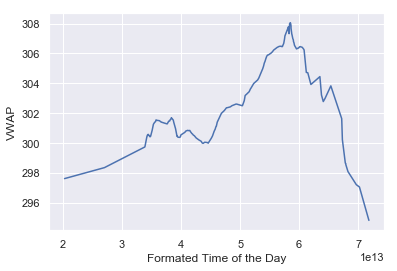

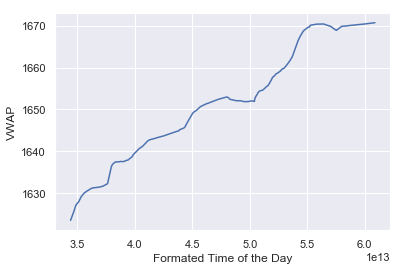

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Let us see the stocks for Tesla.
to_plot = stocks_vwap.loc[stocks_vwap['Stock Name'] == "b'TSLA    '"].sample(n = 300, random_state = 1)
# Plot the responses for different events and regions
sns.lineplot(x = "Formated Time of the Day", y = "VWAP", data = to_plot)
plt.show()


# Let us see the stocks for Amazon.
to_plot = stocks_vwap.loc[stocks_vwap['Stock Name'] == "b'AMZN    '"].sample(n = 200, random_state = 44)
# Plot the responses for different events and regions
sns.lineplot(x = "Formated Time of the Day", y = "VWAP", data = to_plot)
plt.show()